<a href="https://colab.research.google.com/github/sreej1305/Anomaly-Radar/blob/main/Anomaly_Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

np.random.seed(42)

days = 120
data = pd.DataFrame({
    "day": range(days),
    "traffic": np.random.normal(1000, 120, days),
    "latency": np.random.normal(200, 30, days)
})

# Inject drift
data.loc[70:, "traffic"] += np.linspace(0, 500, days-70)
data.loc[90:, "latency"] += 80


In [2]:
baseline = data[data["day"] < 60]
current = data[data["day"] >= 60]

traffic_shift = abs(baseline["traffic"].mean() - current["traffic"].mean())
latency_shift = abs(baseline["latency"].mean() - current["latency"].mean())

traffic_drift = traffic_shift > 150
latency_drift = latency_shift > 50

traffic_drift, latency_drift


(np.True_, np.False_)

In [3]:
from scipy.stats import zscore

data["traffic_z"] = zscore(data["traffic"])
data["latency_z"] = zscore(data["latency"])

data["anomaly"] = (
    (abs(data["traffic_z"]) > 3) |
    (abs(data["latency_z"]) > 3)
)


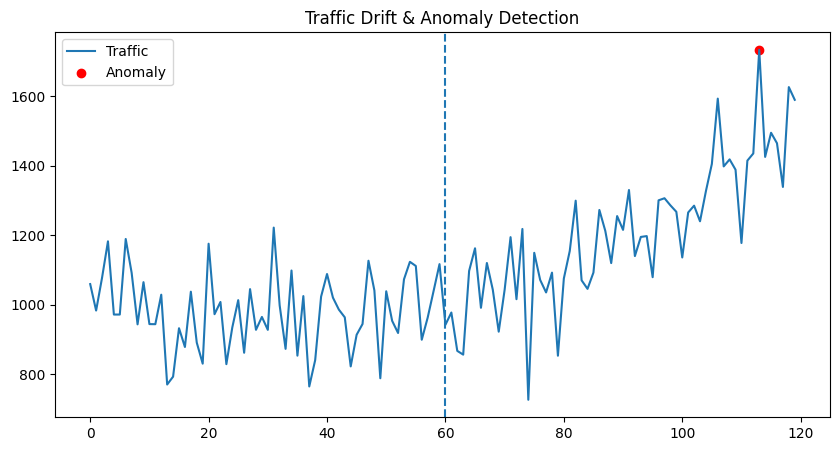

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data["day"], data["traffic"], label="Traffic")
plt.scatter(
    data[data["anomaly"]]["day"],
    data[data["anomaly"]]["traffic"],
    color="red",
    label="Anomaly"
)
plt.axvline(60, linestyle="--")
plt.title("Traffic Drift & Anomaly Detection")
plt.legend()
plt.show()


In [5]:
def generate_insight():
    insights = []
    if traffic_drift:
        insights.append("Significant traffic drift detected.")
    if latency_drift:
        insights.append("Latency distribution shift observed.")
    if not insights:
        insights.append("System behavior is stable.")
    return insights

generate_insight()


['Significant traffic drift detected.']